## Stock Price Prediction using Linear Regression
Predicting the stock market has been the bane and goal of investors since its inception. Every day billions of dollars are traded on the stock exchange, and behind every dollar is an investor hoping to make a profit in one way or another.

Entire companies rise and fall daily depending on market behaviour. If an investor is able to accurately predict market movements, he offers a tantalizing promise of wealth and influence. 

Let’s see how to predict stock prices using Machine Learning and the python programming language. I will start this task by importing all the necessary python libraries that we need for this task:

In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Data Prepration

In [2]:
df=pd.read_csv('AAPL.csv')

In [3]:
df.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [4]:
df1= df['close']

In [5]:
df1

0       132.045
1       131.780
2       130.280
3       130.535
4       129.960
         ...   
1253    314.960
1254    313.140
1255    319.230
1256    316.850
1257    318.890
Name: close, Length: 1258, dtype: float64

### Scaling data

before scaling the data we have to reshape it 

In [6]:
df1= np.array(df1)
df1=df1.reshape(-1,1)

In [7]:
df1.reshape(-1, 1)

array([[132.045],
       [131.78 ],
       [130.28 ],
       ...,
       [319.23 ],
       [316.85 ],
       [318.89 ]])

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(df1)

In [9]:
print(df1)

[[0.17607447]
 [0.17495567]
 [0.16862282]
 ...
 [0.96635143]
 [0.9563033 ]
 [0.96491598]]


### Spliting data into training and testing set

In [10]:
df1.shape

(1258, 1)

spliting 65 percent data for training with sequence

In [11]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [12]:
train_data.shape

(817, 1)

In [13]:
test_data.shape

(441, 1)

In [14]:
training_size, test_size

(817, 441)

In [15]:
train_data[:10]

array([[0.17607447],
       [0.17495567],
       [0.16862282],
       [0.1696994 ],
       [0.16727181],
       [0.16794731],
       [0.16473866],
       [0.16174111],
       [0.1581525 ],
       [0.15654817]])

#### Converting array of matrix into a dataset matrix

In [16]:
import numpy

In [17]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a= dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i+ time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)
    

In [18]:
time_step =100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [19]:
X_test.shape

(340, 100)

In [20]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

#### Model Building 

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

#### Predictions and Model Evaluation

Predictions of Testing Set

In [23]:
predictions= model.predict(X_test)

In [55]:
print("Predicted Value",predictions[:10][0])
print("Expected Value",y_test[:10][0])

Predicted Value 0.26591241262096654
Expected Value 0.2727349489149709


In [56]:
pred_df= pd.DataFrame(predictions)

In [62]:
pred_df['TrueValues']=y_test
# pred_df.head()

In [63]:
new_pred_df=pred_df.rename(columns={0: 'Predictions'})

In [64]:
new_pred_df.head()

,Predictions,TrueValues
0,0.265912,0.272735
1,0.267869,0.276619
2,0.289373,0.280672
3,0.286837,0.265811
4,0.264365,0.268429


In [66]:
import seaborn as sns

Text(0.5, 1.0, 'Predictions Vs True Values on Testing Set')

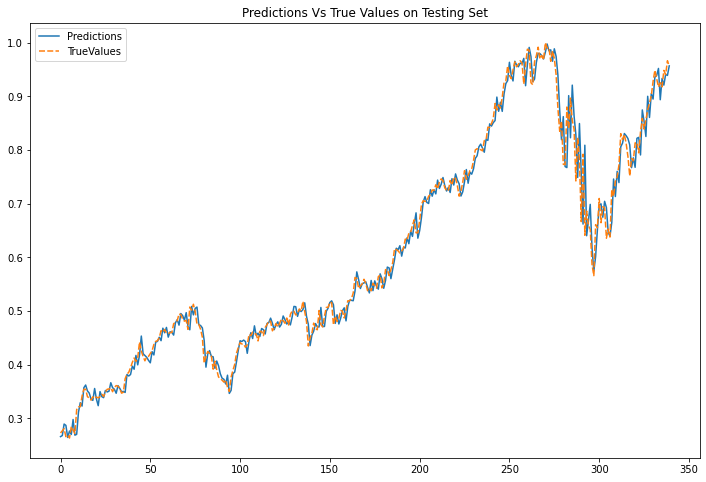

In [78]:
plt.figure(figsize=(12,8))
sns.lineplot(data=new_pred_df)
plt.title("Predictions Vs True Values on Testing Set")

In [79]:
print("model Accuracy is on training data:",model.score(X_train, y_train))

model Accuracy is on training data: 0.9970342320018716


In [80]:
#on Testing data
print(model.score(X_test, y_test))

0.9847722212152704


In [81]:
X_train[2][-1]

0.0903065101747868

In [82]:
y_train[1]

0.0903065101747868

In [83]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict=train_predict.reshape(-1, 1)
test_predict=test_predict.reshape(-1, 1)

#Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [84]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

142.1363100026703

In [85]:
### Test Data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

238.13157949250507

In [86]:
import matplotlib.pyplot as plt

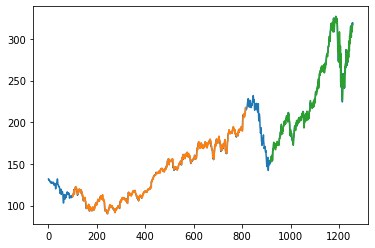

In [87]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

### Now lets Predictions for next 10 days

In [207]:
len(test_data)

441

we are using last 100 days input

In [286]:
x_input = test_data[341:]
x_input.shape

(100, 1)

In [287]:
x_input=x_input.reshape(1,-1)
x_input.shape

(1, 100)

In [288]:
temp_input = list(x_input)
temp_input= temp_input[0].tolist()

In [289]:
len(temp_input)

100

In [270]:
yhat= model.predict(x_input)


In [271]:
temp_input.extend([yhat[0].tolist()])
# temp_input=temp_input[1:]

In [272]:
lst_output=[]

In [273]:
lst_output.extend([yhat.tolist()])

In [274]:
lst_output

[[0.982024563484412]]

In [278]:
x_input = np.array(temp_input[1:])

In [279]:
x_input=x_input.reshape(x_input.shape[0], -1)

In [282]:
x_input=x_input.reshape(1,-1)

In [283]:
x_input.shape

(1, 100)

In [284]:
yhat = model.predict(x_input)

In [285]:
yhat

array([0.97188536])

write a fuctions for demonstrate prediction for next 10 days 

In [246]:
# temp_input

In [290]:
from numpy import array

lst_output = []
n_steps = 100
i = 0;
while (i<30):
    if len(temp_input)>100:
        x_input = np.array(temp_input[1:])
        print('{} day input {}'.format(i, x_input))
        x_input=x_input.reshape(1,-1)
        yhat = model.predict(x_input)
    
        print("{} day output {}".format(i,yhat))
        temp_input.extend([yhat[0].tolist()])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend([yhat.tolist()])
        i=i+1
    
    
    
    else:
        yhat = model.predict(x_input)
#         print(yhat[0])
        temp_input.extend([yhat[0].tolist()])
    
#         print(temp_input)
#         print(len(temp_input))
        lst_output.extend([yhat.tolist()])
        i=i+1
print(lst_output)

1 day input [0.8866419  0.87431394 0.88431985 0.87836697 0.8986321  0.92582116
 0.92877649 0.95676771 0.93869797 0.93304061 0.94950604 0.96424048
 0.95512117 0.95989192 0.96635143 0.96246728 0.92295027 0.9598497
 0.98792536 0.98594106 0.92531453 0.92172591 0.96474711 0.97572406
 0.99159841 0.96972895 0.97614625 0.96795575 1.         0.99016297
 0.99050072 0.96538039 0.98488559 0.97086887 0.94026007 0.87748037
 0.83483915 0.85413324 0.77336823 0.77269273 0.88014017 0.84007431
 0.89673225 0.85527316 0.83884995 0.74233725 0.82327113 0.78143207
 0.6665963  0.7921557  0.64118044 0.68614371 0.66001013 0.65203074
 0.58642236 0.56586169 0.66089673 0.65515494 0.70970193 0.66452757
 0.69437642 0.69218104 0.63569197 0.65266402 0.63780292 0.7267162
 0.71388162 0.74191506 0.75002111 0.77222832 0.83049059 0.8194292
 0.8289707  0.8125475  0.78776492 0.75162543 0.78426074 0.77974331
 0.81326522 0.8141096  0.79473106 0.83336148 0.85898843 0.83901883
 0.85628641 0.87486279 0.88782403 0.90095415 0.927932

In [291]:
lst_output

[[0.982024563484412],
 [0.9718853576045803],
 [0.9720989696892652],
 [0.958570353664447],
 [0.9705487253738869],
 [0.9599441431075892],
 [0.9804969094441378],
 [0.9829427853419237],
 [0.96385792334299],
 [0.9715851613749116],
 [0.964670273063656],
 [0.9770173642340989],
 [0.9560912396300822],
 [0.9597116758435937],
 [0.945648225804399],
 [0.9476348754906423],
 [0.9585587870648005],
 [0.9672527002227163],
 [0.96816930073753],
 [0.9925177433678973],
 [0.9724616670900343],
 [0.9746343303033103],
 [0.9729924091218702],
 [0.9694015213488953],
 [0.9720337919428368],
 [0.9815937327613313],
 [0.9657243759387844],
 [0.9549497596830394],
 [0.9732421983334867],
 [0.9505648424059401]]

In [292]:
day_new = np.arange(1,101)
day_pred = np.arange(101,131)


In [293]:
import matplotlib.pyplot as plt

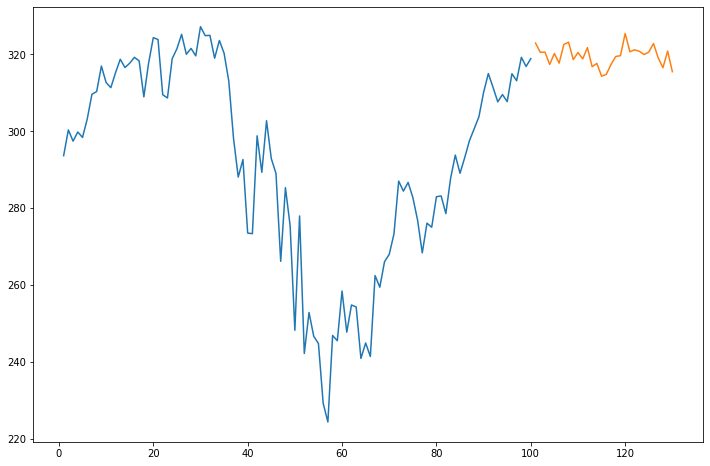

In [295]:
plt.figure(figsize=(12,8))
plt.plot(day_new, scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))